In [1]:
import pandas as pd
df=pd.read_csv("combined_csv.csv")
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'combined_csv.csv'

In [ ]:
df.size

16439136

In [ ]:
df.shape

(146778, 112)

In [ ]:
df.columns

Index(['_meta', 'all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       ...
       'user_reports', 'view_count', 'visited', 'whitelist_status', 'wls',
       'author_cakeday', 'link_flair_template_id', 'post_hint', 'preview',
       'media_metadata'],
      dtype='object', length=112)

In [ ]:
# Select only the columns you're interested in
columns_to_keep = ['author', 'num_comments', 'score', 'selftext', 'title', 'upvote_ratio']
df_selected = df[columns_to_keep]
df_selected.head(5)

,author,num_comments,score,selftext,title,upvote_ratio
0,Akziong511,1.0,1.0,[removed],AITA for giving what people think of me a sign...,1.00
1,AdAlternative6171,1.0,1.0,[removed],WIBTA if I told my conservative transphobic gr...,0.99
2,Objective_Mistake611,1.0,1.0,In the world we live in today; I feel like pe...,AITA for being a realist and blunt when asked ...,1.00
3,Soggy_Rope_,1.0,1.0,[removed],AITA for hating my parents??,1.00
4,Lacy7357,8.0,0.0,I have never been on here asking for help befo...,AITAH Just trying to get some help,0.25


In [ ]:
df_selected.describe()

,num_comments,score,upvote_ratio
count,146777.000000,146777.000000,146776.000000
mean,30.566036,72.128058,0.904097
std,181.339904,555.641826,0.184100
min,0.000000,0.000000,0.020000
25%,1.000000,1.000000,0.900000
50%,1.000000,1.000000,1.000000
75%,9.000000,1.000000,1.000000
max,11655.000000,18401.000000,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

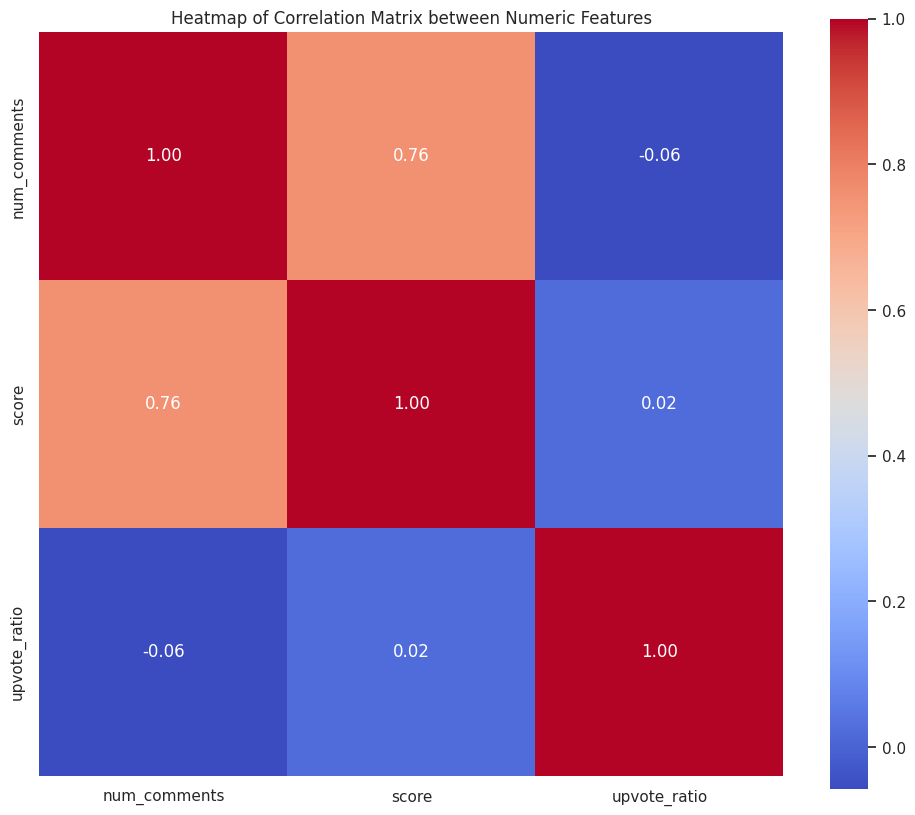

In [ ]:
correlation_matrix = df_selected.select_dtypes(include=['float64', 'int64']).corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix between Numeric Features')
plt.show()

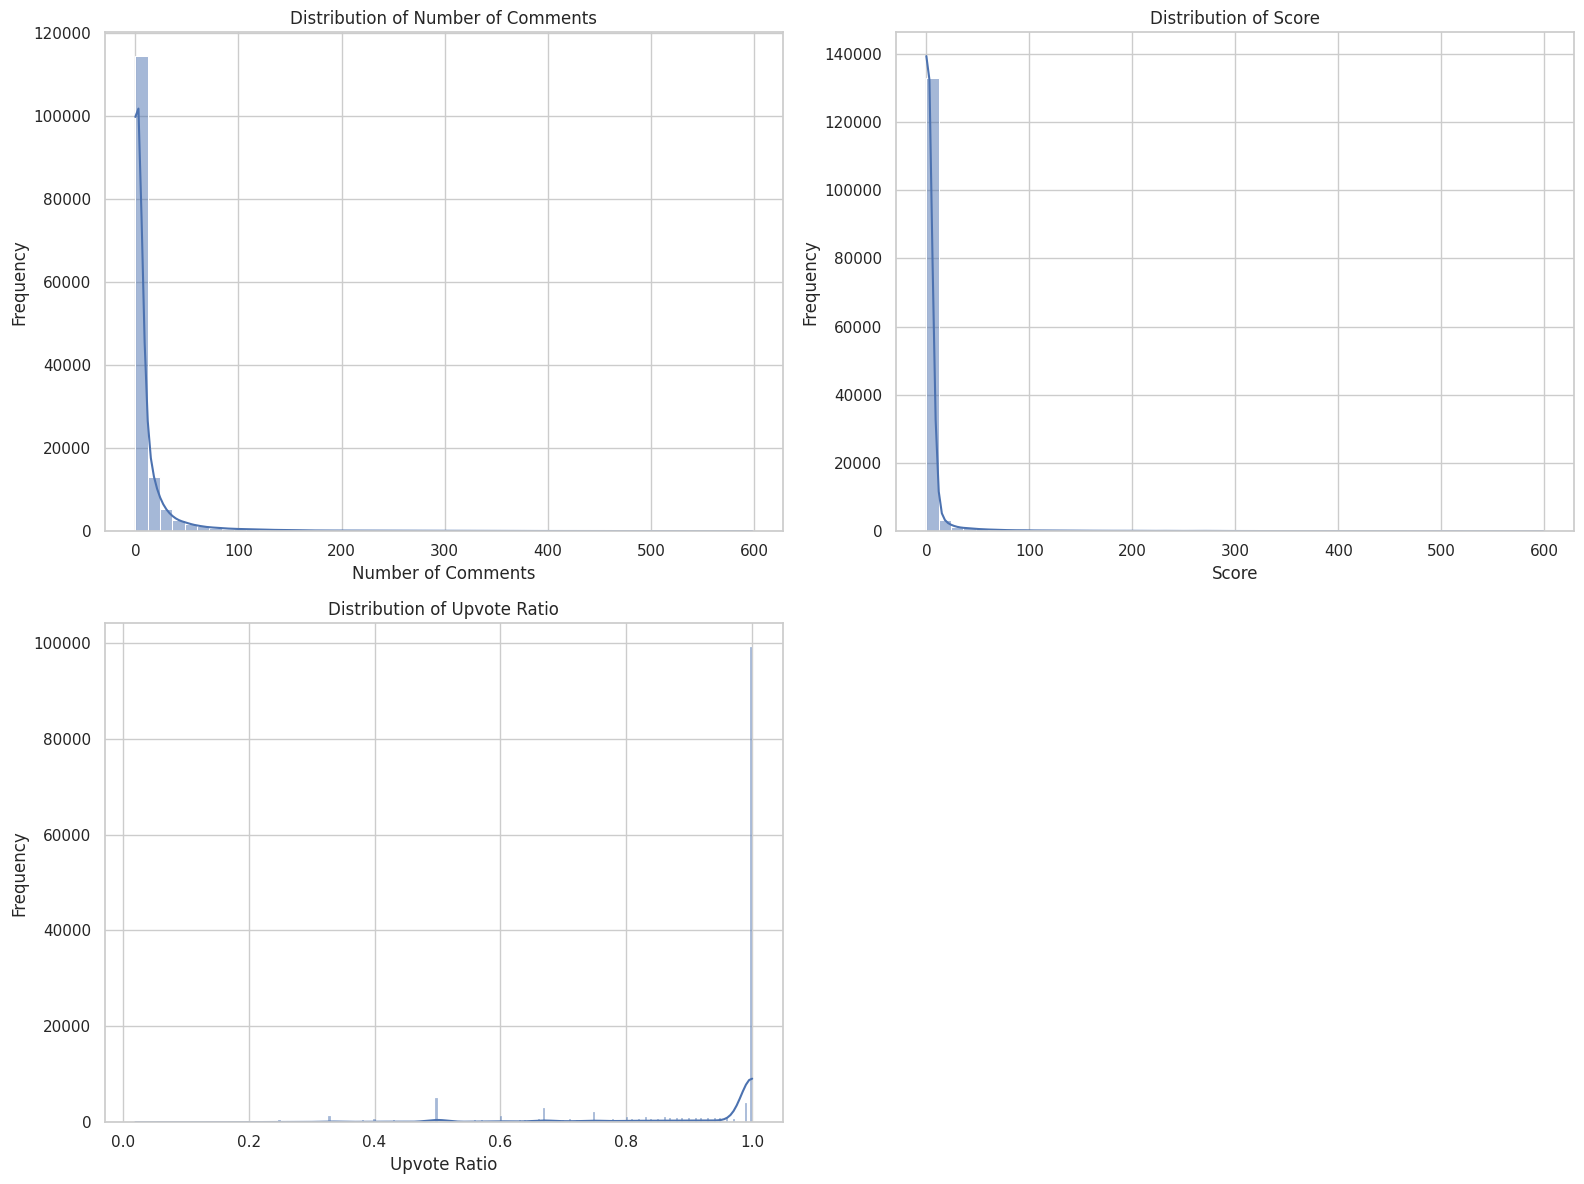

In [ ]:
# Set the size of the overall figure
plt.figure(figsize=(16, 12))

# First plot: Distribution of Number of Comments (limited to < 600 for clarity)
plt.subplot(2, 2, 1)
sns.histplot(df_selected[df_selected['num_comments'] < 600]['num_comments'], bins=50, kde=True)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

# Second plot: Distribution of Score (limited to < 600 for clarity)
plt.subplot(2, 2, 2)
sns.histplot(df_selected[df_selected['score'] < 600]['score'], bins=50, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Fourth plot: Distribution of Upvote Ratio
plt.subplot(2, 2, 3)
sns.histplot(df_selected['upvote_ratio'], kde=True)
plt.title('Distribution of Upvote Ratio')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
print(df_selected['author'].value_counts())

author
[deleted]               1296
#NAME?                    69
wldthtBtheworstthing      39
Disastrous_Ship780        30
Dizzy-Potato3557          24
                        ... 
Sufficient_Cat_3526        1
ChaoticFeralGremlin        1
Floor_Slept                1
HLKTsMom                   1
Wrong-Bedroom1750          1
Name: count, Length: 110746, dtype: int64


In [ ]:
import numpy as np
df_selected['author'] = df_selected['author'].replace({
    '[deleted]': np.nan,
    '#NAME?': np.nan
})

<ipython-input-47-97dddf51b8fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['author'] = df_selected['author'].replace({


In [ ]:
print(df_selected['author'].value_counts())

author
wldthtBtheworstthing    39
Disastrous_Ship780      30
Dizzy-Potato3557        24
MistressLANE_           22
Expert-Worker-5912      21
                        ..
Sufficient_Cat_3526      1
ChaoticFeralGremlin      1
Floor_Slept              1
HLKTsMom                 1
Wrong-Bedroom1750        1
Name: count, Length: 110744, dtype: int64


In [ ]:
# Replace [removed], [deleted], and whitespace-only strings with NaN in the 'selftext' column

df_selected['selftext'] = df_selected['selftext'].replace(
    {'[removed]': np.nan,
    '[deleted]': np.nan}
    )

<ipython-input-49-65f9b4b81094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['selftext'] = df_selected['selftext'].replace(


<ipython-input-50-7d795663183b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')  # 'viridis' is just one option for a color palette


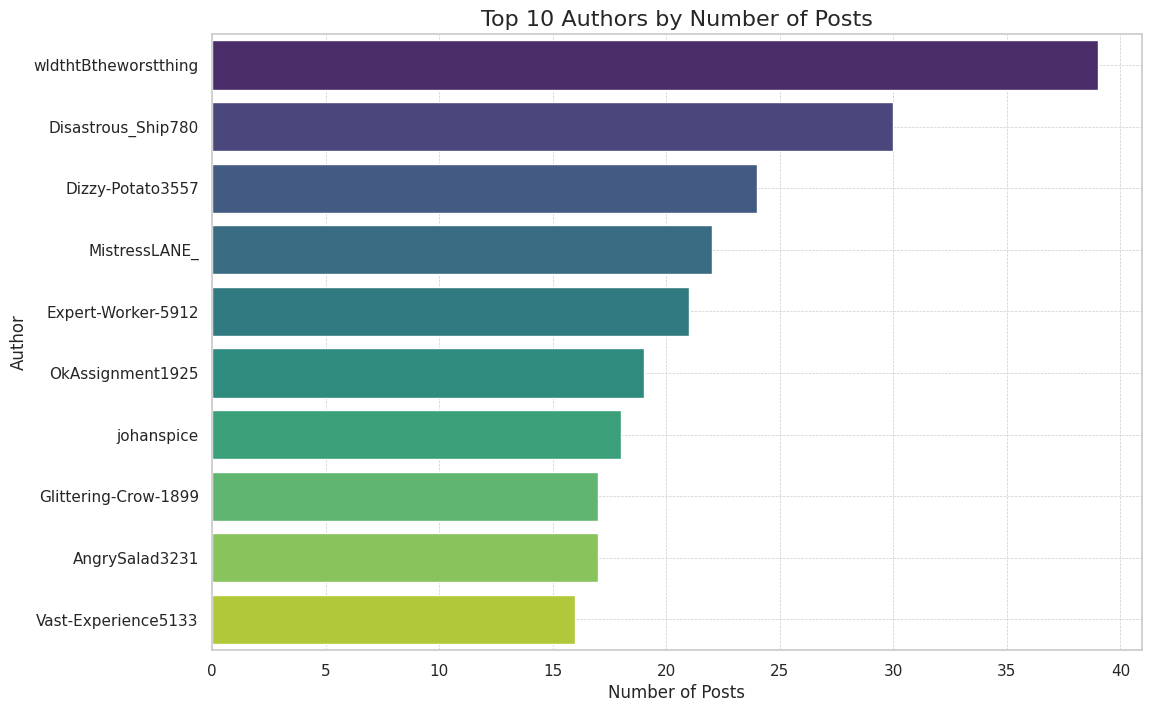

In [ ]:
# Count the number of posts by each author
author_counts = df_selected['author'].value_counts()

# Select the top 10 authors
top_authors = author_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')  # 'viridis' is just one option for a color palette
plt.title('Top 10 Authors by Number of Posts', fontsize=16)
plt.xlabel('Number of Posts', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
df_selected.head()

,author,num_comments,score,selftext,title,upvote_ratio
0,Akziong511,1.0,1.0,NaN,AITA for giving what people think of me a sign...,1.00
1,AdAlternative6171,1.0,1.0,NaN,WIBTA if I told my conservative transphobic gr...,0.99
2,Objective_Mistake611,1.0,1.0,In the world we live in today; I feel like pe...,AITA for being a realist and blunt when asked ...,1.00
3,Soggy_Rope_,1.0,1.0,NaN,AITA for hating my parents??,1.00
4,Lacy7357,8.0,0.0,I have never been on here asking for help befo...,AITAH Just trying to get some help,0.25


Text Analysis

In [ ]:
# Calculate word counts for the 'selftext' and 'title' columns
df_selected['selftext_word_count'] = df_selected['selftext'].fillna('').apply(lambda x: len(x.split()))
df_selected['title_word_count'] = df_selected['title'].fillna('').apply(lambda x: len(x.split()))

# Show descriptive statistics for both word counts
word_count_stats = df_selected[['selftext_word_count', 'title_word_count']].describe()
word_count_stats


<ipython-input-52-6b6aa7692103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['selftext_word_count'] = df_selected['selftext'].fillna('').apply(lambda x: len(x.split()))
<ipython-input-52-6b6aa7692103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['title_word_count'] = df_selected['title'].fillna('').apply(lambda x: len(x.split()))


,selftext_word_count,title_word_count
count,146778.000000,146778.000000
mean,159.159990,11.684333
std,200.928266,5.002050
min,0.000000,0.000000
25%,0.000000,8.000000
50%,0.000000,11.000000
75%,310.000000,14.000000
max,2718.000000,65.000000


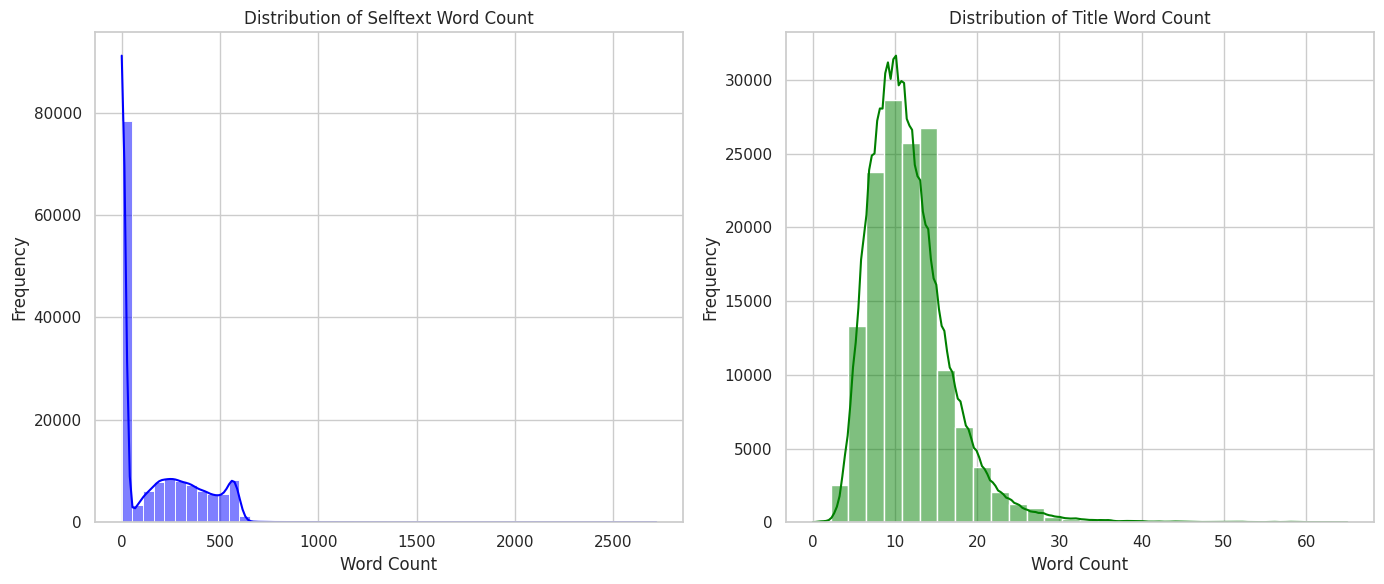

In [ ]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for 'selftext_word_count'
sns.histplot(df_selected['selftext_word_count'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Selftext Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'title_word_count'
sns.histplot(df_selected['title_word_count'], bins=30, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Title Word Count')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Top 20 common words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


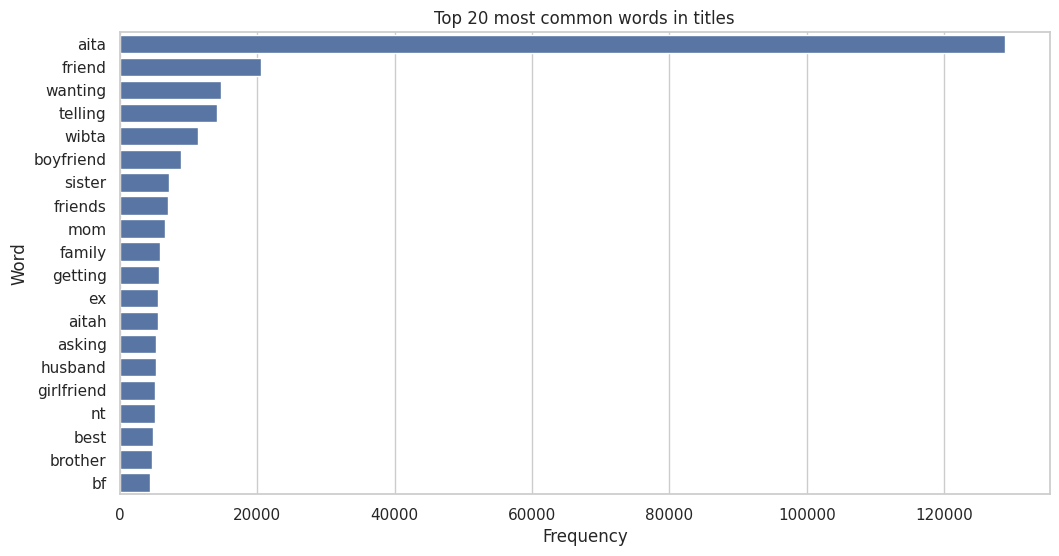

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Create a text data string for the 'title' column
text_data = ' '.join(df_selected['title'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(text_data)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# Remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

# Calculate frequency distribution
from nltk.probability import FreqDist
freq_dist = FreqDist(words)

# Convert to Pandas DataFrame for plotting
df_freq = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot the frequency distribution of the top 20 words
df_freq_head = df_freq.head(20)

# Plot using bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_freq_head)
plt.title('Top 20 most common words in titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


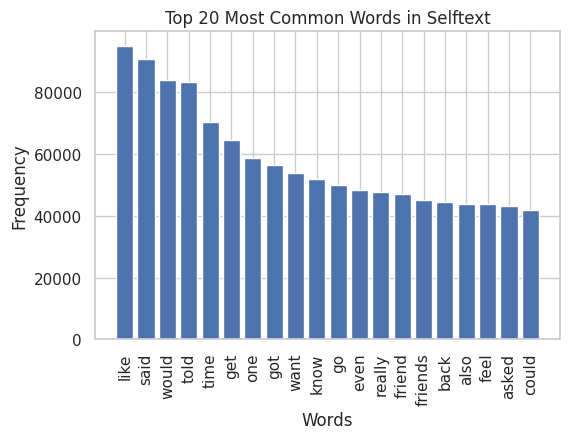

In [ ]:
from nltk import FreqDist
# Join all the non-null 'selftext' entries into a single string
all_selftext = ' '.join(df_selected['selftext'].dropna())

# Tokenize the text
tokens = word_tokenize(all_selftext)

# Convert to lower case and remove non-alphabetic tokens
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

# Calculate the frequency of each word
freq_dist = FreqDist(words)

# Get the 20 most common words
common_words_selftext = freq_dist.most_common(20)

# Separate the words and their frequencies for plotting
words, frequencies = zip(*common_words_selftext)

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(words, frequencies)

# Add title and labels
plt.title('Top 20 Most Common Words in Selftext')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the words on the x-axis so they don't overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
from collections import Counter
import re

# Function to clean and split text
def clean_and_split_text(text):
    # Remove punctuation and numbers and convert text to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Split text into words
    words = text.split()
    return words

# Concatenate all titles into a single string
all_titles = ' '.join(df_selected['selftext'].dropna())

# Clean and split the text
words_in_titles = clean_and_split_text(all_titles)

# Get the most common words
word_freq = Counter(words_in_titles)
most_common_words = word_freq.most_common(20)

# Print the 20 most common words
most_common_words

[('i', 1010685),
 ('and', 841152),
 ('to', 765015),
 ('the', 619864),
 ('my', 501675),
 ('a', 483687),
 ('she', 306834),
 ('that', 301405),
 ('was', 289266),
 ('of', 283575),
 ('for', 268251),
 ('me', 265912),
 ('her', 255583),
 ('he', 254118),
 ('in', 237702),
 ('it', 219285),
 ('with', 205137),
 ('but', 191862),
 ('is', 169564),
 ('we', 162537)]

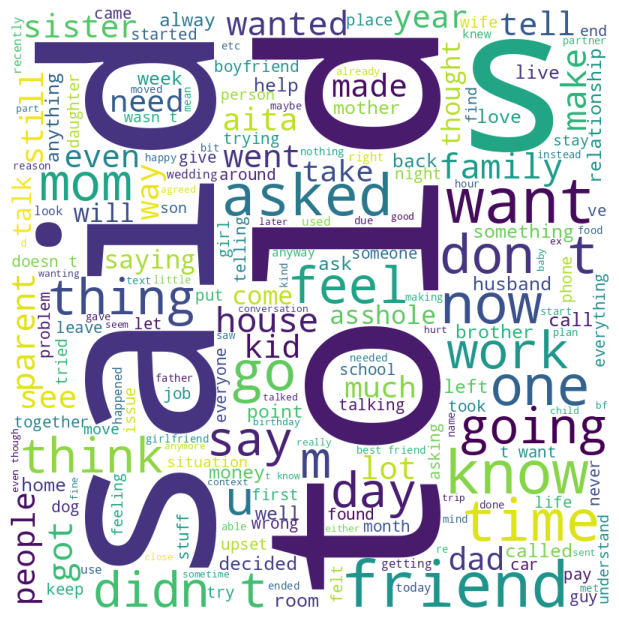

In [ ]:
from wordcloud import WordCloud

# Concatenate all selftexts into a single string, excluding NaN values
all_selftext = ' '.join(df_selected['selftext'].dropna())

# Clean and split the text
words_in_selftext = clean_and_split_text(all_selftext)

# Create the WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white', stopwords = set(WordCloud().stopwords),min_font_size = 10).generate(' '.join(words_in_selftext))

# Plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from collections import Counter
import re

# Function to clean and split text
def clean_and_split_text(text):
    # Remove punctuation and numbers and convert text to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Split text into words
    words = text.split()
    return words

# Concatenate all titles into a single string
all_titles = ' '.join(df_selected['title'].dropna())

# Clean and split the text
words_in_titles = clean_and_split_text(all_titles)

# Get the most common words
word_freq = Counter(words_in_titles)
most_common_words = word_freq.most_common(20)

# Print the 20 most common words
most_common_words

[('for', 142969),
 ('my', 129264),
 ('aita', 123793),
 ('to', 63630),
 ('a', 39255),
 ('not', 30066),
 ('i', 28545),
 ('with', 22106),
 ('the', 20916),
 ('and', 17385),
 ('of', 15510),
 ('friend', 14798),
 ('wanting', 14780),
 ('telling', 14074),
 ('in', 12663),
 ('me', 12586),
 ('her', 12524),
 ('on', 12077),
 ('at', 11470),
 ('wibta', 11115)]

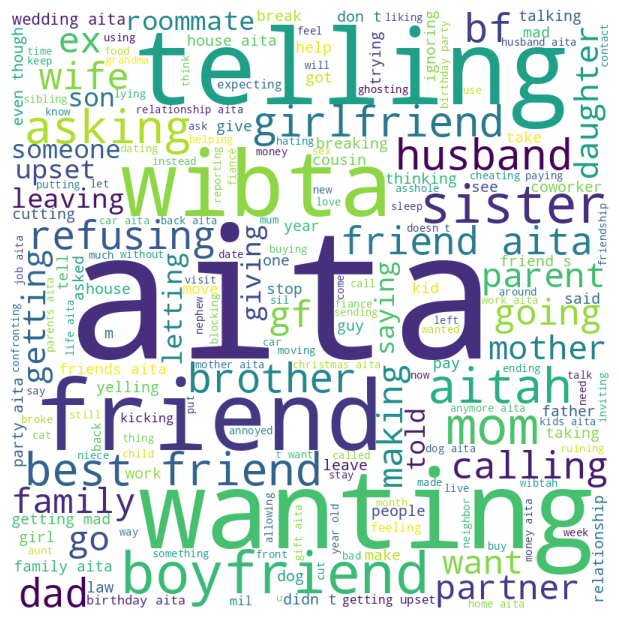

In [ ]:

# Concatenate all selftexts into a single string, excluding NaN values
all_selftext = ' '.join(df_selected['title'].dropna())

# Clean and split the text
words_in_selftext = clean_and_split_text(all_selftext)

# Create the WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white', stopwords = set(WordCloud().stopwords),min_font_size = 10).generate(' '.join(words_in_selftext))

# Plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()